## Student Info

* Student name 1: Nguyễn Thế Hiển
* Student ID 1: 20120078

* Student name 2: Nguyễn Thị Cẩm Lai
* Student ID 2: 20120128

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1_ID2.ipynb` (e.g. `19123_19456.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

import math

In [2]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    # YOUR CODE HERE
    X_train = []
    y_train = []    
    
    data_array = np.loadtxt(file_path,dtype=str,delimiter='\t') #đọc dữ liệu về dạng array, mỗi phần tử là 1 dòng trong file txt
    attribute = [data_array[0][:-1]] #lấy tên các thuộc tính
    
    
    for i in data_array[1:]:
        X_train.append(i[:-1])
        y_train.append(i[-1])
    if split == False:
        return np.concatenate((attribute[:-1],X_train),axis=0),y_train
    else:        
        X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2, random_state=520)
        #gắn thêm tên thuộc tính
        X_train = np.concatenate((attribute,X_train),axis=0)
        X_test = np.concatenate((attribute,X_test),axis=0)
        return X_train, y_train, X_test, y_test

In [27]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 

class DecisionTree:
    def __init__(self):
        self.root = None
        self.header = None
        """
        Root Node: The attribute that best classifies the training data, use this attribute at the root of the tree.
                   The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets.
        """
    def fit(self, X_train, y_train):
        self.attribute = X_train[0]#lấy tên các thuộc tính
        data = X_train[1:]#lấy các mẫu dữ liệu
        labels = set(y_train) #lấy các nhãn có trong kết quả
        n = len(data)#lấy số lượng mẫu dữ liệu
        used_attribute = [] #lưu các thuộc tính đã được sử dụng rồi
        
        self.root = TreeNode(ids = range(n), entropy = self.calculate_entropy(y_train))
        queue = [self.root]
        while queue:
            node = queue.pop()
            subset = []
            for i in node.ids:
                subset.append(data[i])
            
            best_ig = 0
            best_splits = []
            best_attribute = None
            order = None
            #Tìm attr tốt nhất để split node dựa trên độ đo Information Gain
            for col, attr in enumerate(X_train[0]):
                if col in used_attribute:
                    continue
                values = [] #giá trị tương ứng cho các split trong split []
                splits = [] #các dòng có trong các split
                for i in range(len(subset)):
                    t = subset[i][col]
                    if t not in values:
                        values.append(t)
                        splits.append([i])
                    else:
                        for j in range(len(values)):
                            if t == values[j]:
                                splits[j].append(i)

                min_samples_split = 2
                if min(map(len, splits)) < min_samples_split: continue                
                #tính Information Gain
                #Information Gain (IG) = Entropy(S)- Average Information(attribute)
                S = node.entropy
                average_information  = 0
                for split in splits:                      
                     average_information += len(split)*self.calculate_entropy(self.y_split(split,y_train))/len(node.ids)                
                IG = S - average_information 
                min_ig = 1e-4
                if IG < min_ig: continue #stop if small gain
                if IG > best_ig:
                    best_ig = IG
                    best_splits = splits
                    best_attribute = col
                    order = values
            node.set_properties(best_attribute, order)
            used_attribute.append(best_attribute)
            node.children = [TreeNode(ids = split, entropy = self.calculate_entropy(self.y_split(split,y_train))) for split in best_splits]
            
            if not node.children:#là nút lá vì không có nút con
                freq = {}
                y_set = []
                for i in node.ids:
                    y_set.append(y_train[i])
                for i in y_set:
                    freq.setdefault(i, 0)
                    freq[i] += 1
                for i, j in freq.items():
                    if j == max(freq.values()):
                        node.set_label(i)
                        break           
            queue += node.children

    def predict(self, X_test):
        npoints=len(X_test[1:])
        labels = [None]*npoints
        for n in range(npoints):
            x = X_test[1+n]
            node = self.root         
            while node.children:  
                node = node.children[node.order.index(x[node.split_attribute])]
            labels[n] = node.label
            
        return labels

    def visualize(self):
        def dfs(node,spacing=''):
            if node.children:
                for i in range(len(node.children)):
                    print('\n', spacing, end='')
                    print(self.attribute[node.split_attribute],'=', node.order[i], end='')
                    dfs(node.children[i],spacing+'|    ')
            else:
                print(': ',node.label,end='')
        dfs(self.root)
        
    def calculate_entropy(self,s):
        values,counts=np.unique(s,return_counts=True)
        entropy=0
        for i in range(len(values)):
            prob=counts[i]/len(s)
            entropy-=prob*math.log2(prob)
        return entropy
               
    def y_split(self,s,y_train):
        y_split = []
        for i in s:
            y_split.append(y_train[i])  
        return y_split
    
class TreeNode:
        def __init__(self, ids = None, children = None, entropy = 0):
            self.ids = ids # index của dữ liệu trong node này
            self.children = children #node con
            self.entropy= entropy  #entropy của node
            self.split_attribute = None #index của thuộc tính được chọn để split ở node này nếu nó không phải là nút lá
            self.order = None #thứ tự của các node trong self.children  
            self.label = None #nhãn của nút nếu là nút lá              

        def set_properties(self, split_attribute, order):
            self.split_attribute = split_attribute
            self.order = order

        def set_label(self, label):
            self.label = label

In [28]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)


**tennis dataset**

In [29]:
X_train, y_train, X_test, y_test = load_data("data/tennis.txt")

tree=DecisionTree()
tree.fit(X_train, y_train)

y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_hat_train, y_train)
print('With tennis dataset')
print('train accuracy :', acc_train*100, '%')
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_hat_test, y_test)
print('test accuracy :', acc_test*100, '%')
print('\nDecision Tree')
tree.visualize()

With tennis dataset
train accuracy : 72.72727272727273 %
test accuracy : 33.33333333333333 %

Decision Tree

 outlook = rain
 |    temperature = mild:  no
 |    temperature = cool:  no
 outlook = sunny:  no
 outlook = overcast:  yes

**titanic2 dataset**

In [30]:
X_train, y_train, X_test, y_test = load_data("data/titanic2.txt")

tree=DecisionTree()
tree.fit(X_train, y_train)

y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_hat_train, y_train)
print('With titanic2 dataset')
print('train accuracy :', acc_train*100, '%')
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_hat_test, y_test)
print('test accuracy :', acc_test*100, '%')
print('\nDecision Tree')
tree.visualize()

With titanic2 dataset
train accuracy : 77.8409090909091 %
test accuracy : 76.64399092970523 %

Decision Tree

 sex = male:  no
 sex = female:  yes

### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution




**Trực quan hóa mối quan hệ giữa 'survived' và 'sex'**

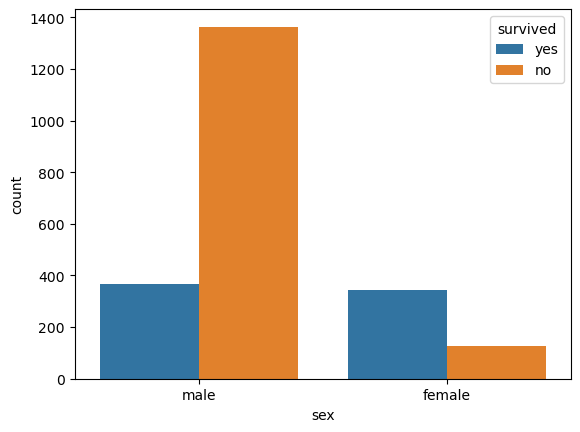

In [7]:
import seaborn as sns
df = pd.read_csv("data/titanic2.txt", delim_whitespace=True)
sns.countplot(data=df, x="sex", hue="survived");

**Nhận xét:**
- Tỉ lệ hành khách nam nhiều gần gấp 4 lần hành khách nữ, nhưng nữ có tỉ lệ sống sót nhiều hơn nam. Cho thấy kết quả phân loại từ thuật toán ID3 có vẻ hợp lý:
    - sex = male:  no
    - sex = female:  yes
    
---

**Accuracy score** trên tập train và tập test gần bằng nhau (train accuracy : 77.84, test accuracy : 76.64) , điều này có thể cho thấy mô hình phân loại xây dựng bởi thuật toán ID3 không bị overfitting hoặc underfitting. Hay mô hình phân loại này hoạt động hiệu quả và có khả năng dự đoán chính xác trên các tập dữ liệu mới. 

Tuy nhiên để đánh giá chính xác tính hiệu quả của mô hình, ngoài accuracy score ta có thể sử dụng thêm các độ đo khác để đánh giá mô hình như: precision, recall, F1-score... để có cái nhìn tổng quan và đầy đủ hơn về khả năng dự đoán của mô hình trên tập dữ liệu thực tế.

In [8]:
print("Metrics on Train set:")
print(classification_report(y_train, y_hat_train))

Metrics on Train set:
              precision    recall  f1-score   support

          no       0.79      0.92      0.85      1191
         yes       0.74      0.49      0.59       569

    accuracy                           0.78      1760
   macro avg       0.76      0.70      0.72      1760
weighted avg       0.77      0.78      0.76      1760



In [9]:
print("Metrics on Test set:")
print(classification_report(y_test, y_hat_test))

Metrics on Test set:
              precision    recall  f1-score   support

          no       0.78      0.91      0.84       299
         yes       0.71      0.46      0.56       142

    accuracy                           0.77       441
   macro avg       0.75      0.69      0.70       441
weighted avg       0.76      0.77      0.75       441



**Nhận xét:**

Kết quả các độ đo precision, recall, f1-score cho phân loại `survived = yes` rất thấp. Nguyên nhân là do bộ dữ liệu bị mất cân bằng (tỉ lệ nam nhiều hơn nữ, nhưng tỉ lệ sống sót của nữ lại cao hơn nam, tỉ lệ người sống sót thấp hơn tỉ lệ người chết).

---

**Hướng giải quyết**

Với độ chính xác (accuracy score) này, ta có thể cải thiện mô hình của mình bằng cách tinh chỉnh các siêu tham số của thuật toán như: criterion, max_depth, min_samples_split, max_features, max_leaf_nodes, ...

Một cách để cải thiện mô hình phân loại với dữ liệu mất cân bằng là sử dụng các kỹ thuật xử lý dữ liệu mất cân bằng trước khi huấn luyện mô hình. Dưới đây là một số kỹ thuật phổ biến:

1. Tăng mẫu: Tạo ra thêm các mẫu cho lớp thiểu số bằng các phương pháp như sao chép, tăng cường hoặc chuyển đổi các mẫu hiện có.

2. Giảm mẫu: Loại bỏ bớt các mẫu đại diện quá nhiều hoặc làm cho mô hình dễ bị lệch.

3. Kết hợp giảm mẫu và tăng mẫu: Kết hợp cả hai kỹ thuật trên để tăng độ chính xác và giảm sự lệch.

4. Sử dụng các thuật toán phân loại có tính khả diễn giải: Điều này cho phép người sử dụng dễ dàng hiểu được quá trình phân loại của mô hình và tìm ra nguyên nhân sự lệch dữ liệu.

5. Sử dụng các thuật toán phân loại tối ưu hóa trọng số: Điều này cho phép áp dụng các trọng số khác nhau cho các lớp dữ liệu khác nhau để tránh sự lệch dữ liệu.

6. Sử dụng các thuật toán phân loại bởi trí suy luận: Điều này cho phép mô hình tìm ra sự tương quan giữa các biến và lớp để giảm sự lệch dữ liệu.

7. Sử dụng các phương pháp tinh chỉnh ngưỡng: Điều này cho phép tinh chỉnh ngưỡng dự đoán để đạt được cân bằng cho các phân loại.


## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [35]:
seed = 520 # for reproducibility

In [36]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

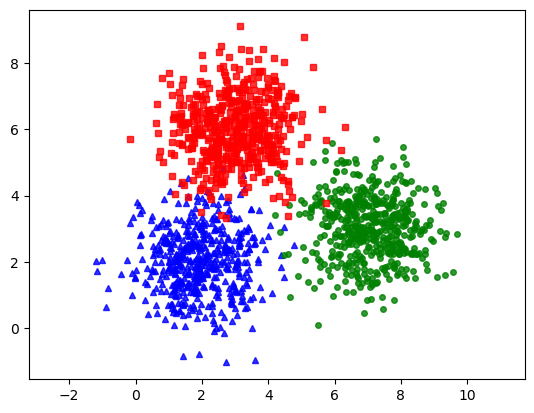

In [37]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [38]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    
    # YOUR CODE HERE
    return X[np.random.choice(X.shape[0], size=k, replace=False)]

In [39]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [40]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin

    # YOUR CODE HERE
    distance_array = cdist(X, centers)
    return np.argmin(distance_array, axis = 1)

In [41]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [42]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        centers[k] = np.mean(X[labels == k], axis=0)     
    return centers

In [43]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same

    # YOUR CODE HERE
    set_centers = set([tuple(x) for x in centers])
    set_new_centers = set([tuple(x) for x in new_centers])
    return set_centers == set_new_centers

In [44]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        # 1. assign label for each points and append to labels
        new_labels = kmeans_assign_labels(X, centers[-1])
        labels.append(new_labels)
        # 2. update the centers
        new_centers = kmeans_update_centers(X, labels[-1], K)
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        # 4. update iteration 
        it += 1
    return (centers, labels, it)

Centers found by k-means algorithm:
[[2.96402177 6.01105837]
 [7.03594941 3.05108601]
 [1.92067563 2.03188976]]


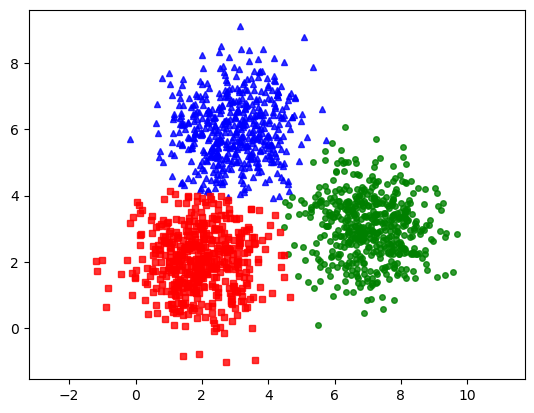

In [45]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

- Thuật toán k-mean cho kết quả phân cụm tốt, hội tụ và gần khớp với nhãn trong bộ test.
- Không có sự chồng chéo (overlap) trên 3 cụm.
- Tâm của tất cả các cụm do thuật toán đưa ra khớp với tâm ban đầu.

---

**Question 3:** 

**Drawbacks of K-means clustering algorithm (0.5)**

Thuật toán K-means là một trong những giải thuật phổ biến nhất cho việc phân loại dữ liệu và khai thác dữ liệu, tuy nhiên nó cũng có một số nhược điểm như sau:

- Nhạy cảm với giá trị khởi tạo ban đầu: Kết quả cuối cùng của K-means phụ thuộc rất nhiều vào các giá trị khởi tạo ban đầu của các đối tượng trung tâm. Cách khởi tạo ban đầu không tốt có thể dẫn đến kết quả cuối cùng kém.
- Không tìm được kết quả global optimum: K-means có xu hướng dừng lại ở một kết quả cục bộ mà không phải là kết quả tối ưu toàn cục. Điều này có nghĩa là nó không tìm được trọng tâm tối ưu cho tất cả các cụm.
- Không hoạt động hiệu quả đối với dữ liệu phi tuyến tính: K-means hoạt động tốt trên những tập dữ liệu có tính phân tán hình cầu. Tuy nhiên, khi dữ liệu không phải là phân tán hình cầu, K-means sẽ không hoạt động hiệu quả và dẫn đến các phân nhóm sai.
- Giới hạn về số lượng phân nhóm: K-means yêu cầu người dùng phải chỉ định trước số lượng phân nhóm. Việc chọn số lượng phân nhóm phù hợp tùy thuộc vào người dùng và tính chất của dữ liệu. Nhưng không phải lúc nào cũng có một giá trị phù hợp cho số lượng phân nhóm.
- Nhạy cảm với các ngoại lệ: Thuật toán phân cụm K-means rất nhạy cảm với các ngoại lệ, có thể ảnh hưởng đáng kể đến việc đặt các trung tâm cụm và các cụm kết quả. Trong nhiều trường hợp, các giá trị ngoại lệ phải được xử lý trước khi áp dụng thuật toán K-means.

Nhìn chung, thuật toán phân cụm K-means là một thuật toán phổ biến và được sử dụng rộng rãi, nhưng nó có những hạn chế của nó và nên được sử dụng một cách thận trọng.


**Propose solutions to the drawbacks you stated above (0.25)**

Có một số giải pháp để khắc phục hoặc giảm thiểu những bất lợi của thuật toán K-means, bao gồm:

- Phương pháp giải quyết với thuật toán K-means:
    - Thử chạy thuật toán với nhiều giá trị K để xác định số nhóm phù hợp cho bộ dữ liệu.
    - Thử ngẫu nhiên nhiều lần vị trí tâm để có kết quả tốt nhất khi giá trị K nhỏ.
- Dùng thuật toán thay thế khắc phục:
    - Để xác định được giá trị K (số lượng phân nhóm) tối ưu hơn, từ đó giảm thiểu rủi ro do lựa chọn giá trị K sai, ta có thể sử dụng các phương pháp như: Elbow Method, Silhouette Analysis, Gap Statistics,...
    - Sử dụng các biến thể của thuật toán K-means như K-medoids và K-modes, có thể xử lý dữ liệu hỗn hợp và dữ liệu không phân cụm hơn.
    - Để giảm thiểu sự ảnh hưởng của các giá trị nhiễu, ta có thể sử dụng các phương pháp tiếp cận để xử lý giá trị này. Ví dụ, có thể sử dụng phương pháp loại bỏ các giá trị nhiễu trước khi đưa vào thuật toán, hoặc sử dụng thuật toán K-means hiệu chỉnh (robust K-means) có khả năng xử lý nhiễu và giá trị bất thường.
    - Sử dụng các phương pháp khác hỗ trợ việc phân cụm dữ liệu, chẳng hạn như Hierarchical Clustering, Density-Based Clustering, Spectral Clustering,... Những phương pháp này phù hợp cho dữ liệu có cấu trúc phức tạp và giúp khắc phục những giới hạn của K-means.




### Referrence:

[1] https://phamdinhkhanh.github.io/deepai-book/ch_ml/DecisionTree.html

[2] https://github.com/coder0211/DecisionTreeID3
